In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import time
from scipy.misc import imread
from scipy.misc import imresize
import matplotlib.image as mpimg
from scipy.ndimage import filters
import urllib
from numpy import random
import sys
import pickle
import os
from scipy.io import loadmat
# Load the MNIST digit data
M = loadmat("mnist_all.mat")

In [60]:
def softmax(y):
    '''Return the output of the softmax function for the matrix of output y. y
    is an NxM matrix where N is the number of outputs for a single case, and M
    is the number of cases'''
    return exp(y) / tile(sum(exp(y), 0), (len(y), 1))
def cost_function(y, p):
    return -np.nansum(y * np.log(p))

In [61]:
def part2(x, W0, b0):
    #print(b0.shape, W0.shape)
    total_W0 = np.concatenate((b0, W0))
    added_ones = np.ones(x.shape[1]).reshape(x.shape[1], 1)
    total_x = np.concatenate((added_ones.T, x))
    vals = softmax(np.dot(total_W0.T, total_x))
    return vals.T

def part3(x, y1, p):
    deriv = np.subtract(p, y1)
    added_ones = np.ones(x.shape[1]).reshape(x.shape[1], 1)
    total_x = np.concatenate((added_ones.T, x))
    deriv = np.matmul(deriv.T, total_x.T).T
    return deriv  # shape 10, 785

In [21]:
def get_data(M):
    train_keys = [key for key in M.keys() if "train" in key]
    data_length = 0
    for train_k in train_keys:
        data_length += M[train_k].shape[0]

    # concatenate all the data
    train_data = np.zeros((data_length, 784))
    data_counter = 0
    data_size = 0

    train_y = np.zeros((data_length, 10))
    for i, train_k in enumerate(train_keys):
        data_size = M[train_k].shape[0]
        #print(i, data_size)
        train_data[data_counter: data_counter + data_size, :] = M[train_k]
        train_y[data_counter: data_counter + data_size, i] = 1
        data_counter += data_size
    return train_data, train_y

In [47]:
weights = np.loadtxt("final_weightspart5.txt")
weights_bias = weights[-1, :].reshape(1, 10)
weights = weights[:-1, :]
print(weights.shape, weights_bias.shape), #alter, (300, 400) 5
weights[0, :10]

(784, 10) (1, 10)


array([  7.69994424e+03,   2.37933647e+06,   4.68478987e+06,
         9.74509781e+05,   1.91209977e+06,   1.33066817e+07,
         1.44363967e+06,   5.09049281e+06,  -2.31239779e+07,
        -6.67536215e+06])

In [48]:
x, y = get_data(M)
x = x.T/255./255.

In [72]:
ind1 = 300
ind2 = 400
fine_grain = 15
print(weights[ind1, 5], weights[ind2, 5])
range_val = 100.
vary_w1 = np.linspace(weights[ind1, 5]- range_val, weights[ind1, 5]+range_val, fine_grain)
vary_w2 = np.linspace(weights[ind2, 5]- range_val, weights[ind2, 5]+range_val, fine_grain)
print(vary_w1, vary_w2)

-968.093069287 -480.779415229
[-1068.09306929 -1053.807355   -1039.52164072 -1025.23592643 -1010.95021214
  -996.66449786  -982.37878357  -968.09306929  -953.807355    -939.52164072
  -925.23592643  -910.95021214  -896.66449786  -882.37878357  -868.09306929] [-580.77941523 -566.49370094 -552.20798666 -537.92227237 -523.63655809
 -509.3508438  -495.06512952 -480.77941523 -466.49370094 -452.20798666
 -437.92227237 -423.63655809 -409.3508438  -395.06512952 -380.77941523]


In [73]:
start = time.time()
contour = np.zeros((fine_grain, fine_grain))
for i in range(fine_grain):
    for j in range(fine_grain):
        weights[300, 5] = vary_w1[i]
        weights[400, 5] = vary_w2[j]
        output2 = part2(x, weights, weights_bias)
        cost2 = cost_function(y, output2)     
        contour[i, j] = cost2
    if (i%10 ==9):
        print(i)
end = time.time()
print("Time taken: {0}".format(end - start))

/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log
/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in multiply


9


In [81]:
def df(x, W0, y):
    # this W0 is assumed to have the bias incorperated into it
    #print(W0.shape, y.shape)
    W1, b0 = W0[:-1, :].reshape(784, W0.shape[1]), W0[-1, :].reshape(1, 10)
    vals = part2(x, W1, b0)
    return part3(x, y, vals)

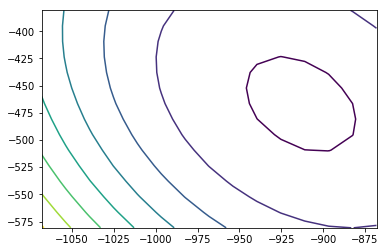

In [74]:
plt.contour(vary_w1, vary_w2, contour)
plt.show()

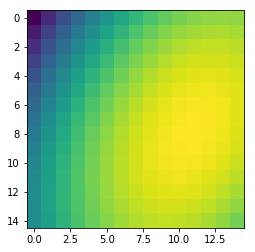

In [80]:
#print(contour)
plt.imshow(contour, cmap = "viridis_r")
plt.show()

In [ ]:
#use vanilla gradient descent